In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import statsmodels.api as sm
import folium
%matplotlib inline
sns.set()

In [2]:
#Import Results Data
df1 = pd.read_csv('results_full4(+weather).csv')

In [3]:
#Specify two variables to investigate with a Dendogram.
df2 = df1[['lap', 'milliseconds']]

In [4]:
#Reduce range of milliseconds so we make sure to focus on the majority of data, while avoiding most of the high outliers.
df3 = df2[df2['milliseconds'] < 40000]

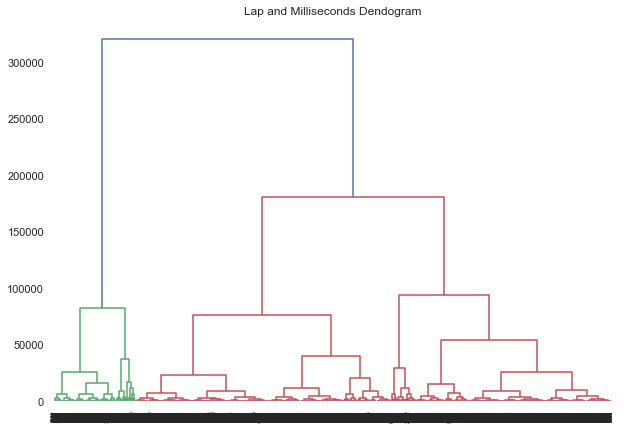

In [5]:
#Plot the Dendogram (this may take a few minutes, even on a high-end computer)
plt.figure(figsize=(10, 7))  
plt.title("Lap and Milliseconds Dendogram")  
dend = shc.dendrogram(shc.linkage(df3, method='ward'))  

In [6]:
#Drawing a horizontal line that passes through the longest vertical distance without a horizontal line, we find that
#there is 4 clusters that we should focus on in plotting the clusters in a scatterplot.
#So we create an array that displays the cluster labels of all the data points.

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df3)  

array([2, 2, 3, ..., 2, 1, 3], dtype=int64)

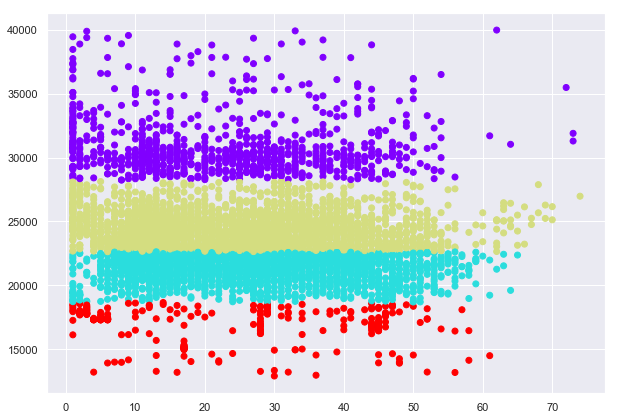

In [7]:
#Finally, we can create a scatterplot for the array of data points that are tied to one of the four clusters.
#We can see some patterns, like how most of the shortest pit-stops (those in red and below 20000) are performed by drivers
#before they have driven 50 laps in a race.
#Another pattern is that there seems to be a stange increase in the duration of pit-stops if a driver has driven
#over 60 laps in a race (those in the dark yellow)

plt.figure(figsize=(10, 7))  
plt.scatter(df3['lap'], df3['milliseconds'], c=cluster.labels_, cmap='rainbow')  

In [8]:
#Now we'll prep the same scatterplot to have centroids added to their k-mean clusters.
kmeans = KMeans(n_clusters=4)
kmeans.fit(df3)
df3_kmeans = kmeans.predict(df3)

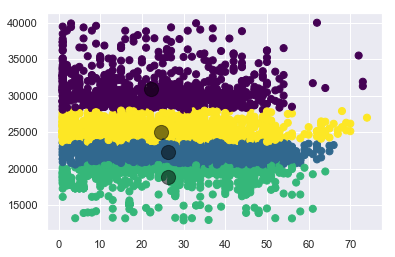

In [9]:
#Here we finally add them, noticable by the larger, darkly-shaded circles.
plt.scatter(df3['lap'], df3['milliseconds'], c=df3_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [10]:
#Specify two variables to investigate with a Dendogram.
df4 = df1[['points', 'milliseconds']]

In [11]:
#Reduce range of milliseconds so we make sure to focus on the majority of data, while avoiding most of the high outliers.
#Reduce range of points to keep focus on majority of data, getting rid of points above 25.
df5 = df4[df4['milliseconds'] < 40000]
df6 = df5[df5['points'] < 29]

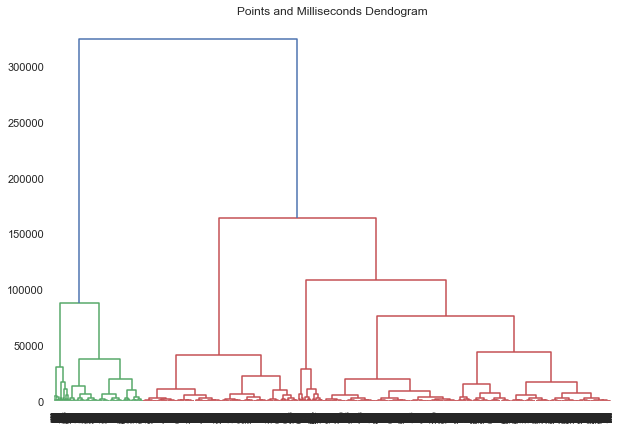

In [12]:
#Plot the Dendogram (this may take a few minutes, even on a high-end computer)
plt.figure(figsize=(10, 7))  
plt.title("Points and Milliseconds Dendogram")  
dend = shc.dendrogram(shc.linkage(df6, method='ward'))  

In [13]:
#Drawing a horizontal line that passes through the longest vertical distance without a horizontal line, we find that
#there is 4 clusters that we should focus on in plotting the clusters in a scatterplot.
#So we create an array that displays the cluster labels of all the data points.

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df6)  

array([1, 1, 3, ..., 2, 1, 3], dtype=int64)

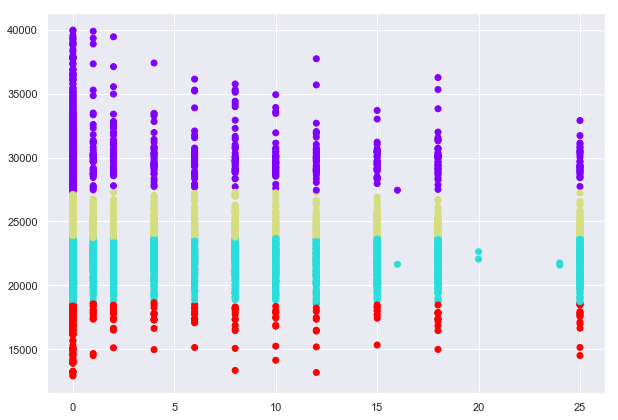

In [14]:
#Finally, we can create a scatterplot for the array of data points that are tied to one of the four clusters.
plt.figure(figsize=(10, 7))  
plt.scatter(df6['points'], df6['milliseconds'], c=cluster.labels_, cmap='rainbow')

In [15]:
#Now we'll prep the same scatterplot to have centroids added to their k-mean clusters.
kmeans = KMeans(n_clusters=4)
kmeans.fit(df6)
df6_kmeans = kmeans.predict(df6)

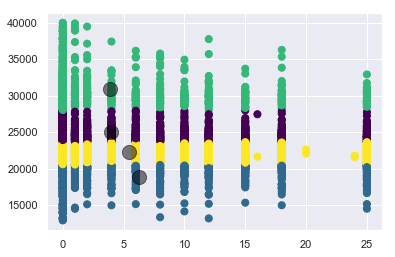

In [16]:
#Here we finally add them, noticable by the larger, darkly-shaded circles.
plt.scatter(df6['points'], df6['milliseconds'], c=df6_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);